In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')


In [62]:
df = pd.read_csv("../../data/processed/1_aggregated_pueblos.csv")

In [63]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', 'lat_bin', 'lon_bin', 'towns_in_vicinity',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'vdsl_30mbps',
       'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps',
       'reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz',
       'count_of_stations', 'suburban_train'],
      dtype='object')

In [64]:
df = df.drop(df[df['province'].isin(["Illes Balears", "Santa Cruz de Tenerife", 'Palmas, Las'])].index)

# 1. Population

<Axes: xlabel='total_population', ylabel='Count'>

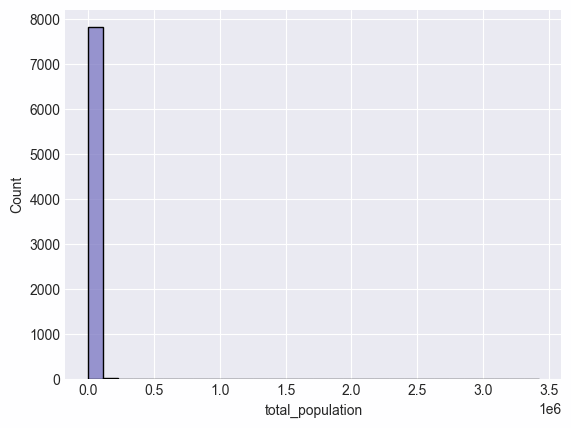

In [65]:
sns.histplot(df, x="total_population", bins=30)


<Axes: ylabel='total_population'>

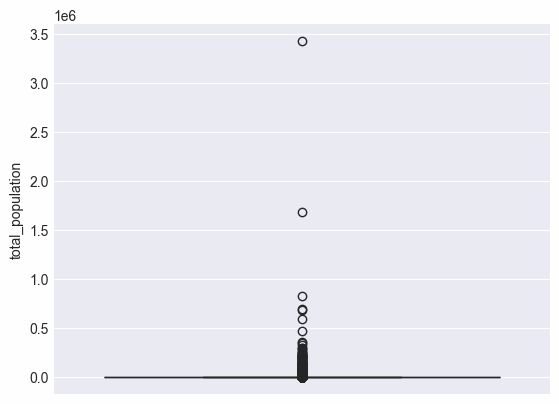

In [66]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [67]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [68]:
lower, upper = calculate_whiskers(df, "total_population")
print("Upper Whisker total population", upper)

Upper Whisker total population 5454


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7874 entries, 0 to 8024
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cmun                       7874 non-null   int64  
 1   municipality               7874 non-null   object 
 2   province                   7874 non-null   object 
 3   autonomous_community       7874 non-null   object 
 4   altitude                   7874 non-null   float64
 5   longitude                  7874 non-null   float64
 6   latitude                   7874 non-null   float64
 7   lat_bin                    7874 non-null   int64  
 8   lon_bin                    7874 non-null   int64  
 9   towns_in_vicinity          7870 non-null   object 
 10  0-17                       7874 non-null   int64  
 11  18-24                      7874 non-null   int64  
 12  25-34                      7874 non-null   int64  
 13  35-54                      7874 non-null   int64  
 1

In [70]:
df_cities = df.query("total_population > 20000")

In [71]:
title = "Cities in Spain"

lats = df_cities.latitude
lons = df_cities.longitude

fig = px.scatter_map(df_cities, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )

# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")

fig.show()

In [72]:
df_cities.to_csv("../../data/processed/split_cities.csv")

In [73]:
df = df.query("total_population <= 6000")

<Axes: xlabel='total_population', ylabel='Count'>

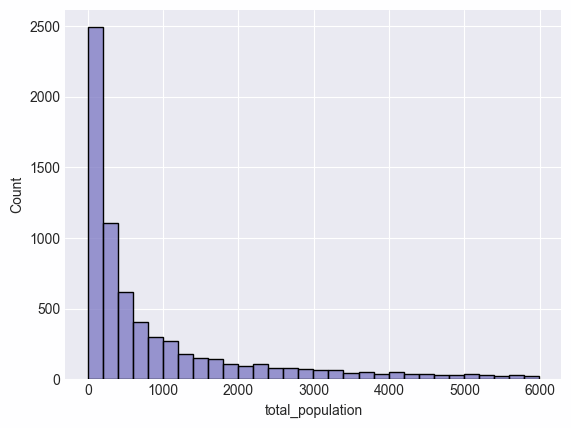

In [74]:
sns.histplot(df, x="total_population", bins=30)

<Axes: ylabel='total_population'>

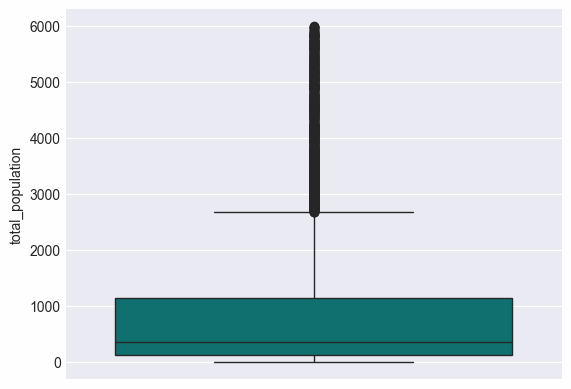

In [75]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'Burgos'),
  Text(1, 0, 'Salamanca'),
  Text(2, 0, 'Guadalajara'),
  Text(3, 0, 'Zaragoza'),
  Text(4, 0, 'Ávila'),
  Text(5, 0, 'Navarra'),
  Text(6, 0, 'Zamora'),
  Text(7, 0, 'Teruel'),
  Text(8, 0, 'Cuenca'),
  Text(9, 0, 'Lleida'),
  Text(10, 0, 'Valladolid'),
  Text(11, 0, 'Cáceres'),
  Text(12, 0, 'Segovia'),
  Text(13, 0, 'León'),
  Text(14, 0, 'Huesca'),
  Text(15, 0, 'Girona'),
  Text(16, 0, 'Palencia'),
  Text(17, 0, 'Barcelona'),
  Text(18, 0, 'Valencia'),
  Text(19, 0, 'Toledo'),
  Text(20, 0, 'Soria'),
  Text(21, 0, 'La Rioja'),
  Text(22, 0, 'Tarragona'),
  Text(23, 0, 'Badajoz'),
  Text(24, 0, 'Granada'),
  Text(25, 0, 'Castellón'),
  Text(26, 0, 'Madrid'),
  Text(27, 0, 'Ciudad Real'),
  

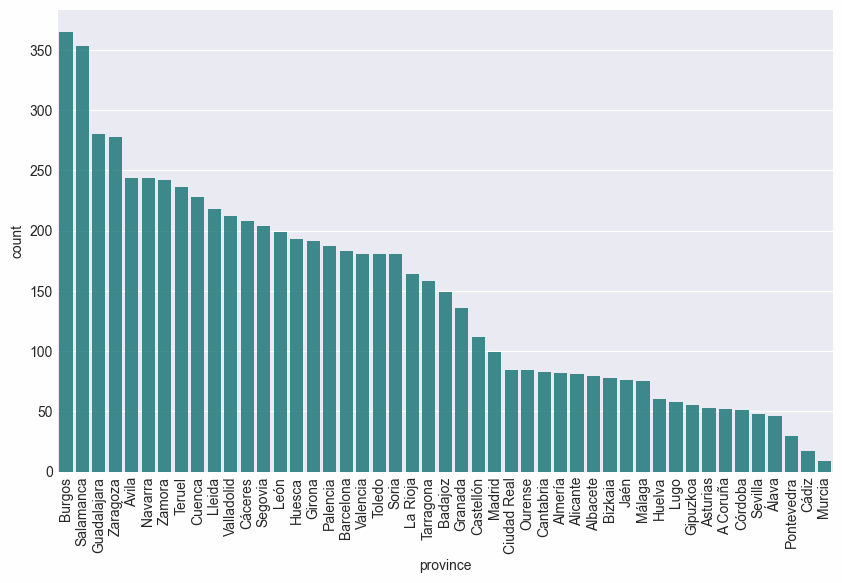

In [76]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "province",order=df["province"].value_counts().index, ax=ax1, color="teal", alpha = 0.8)
plt.xticks(rotation=90)


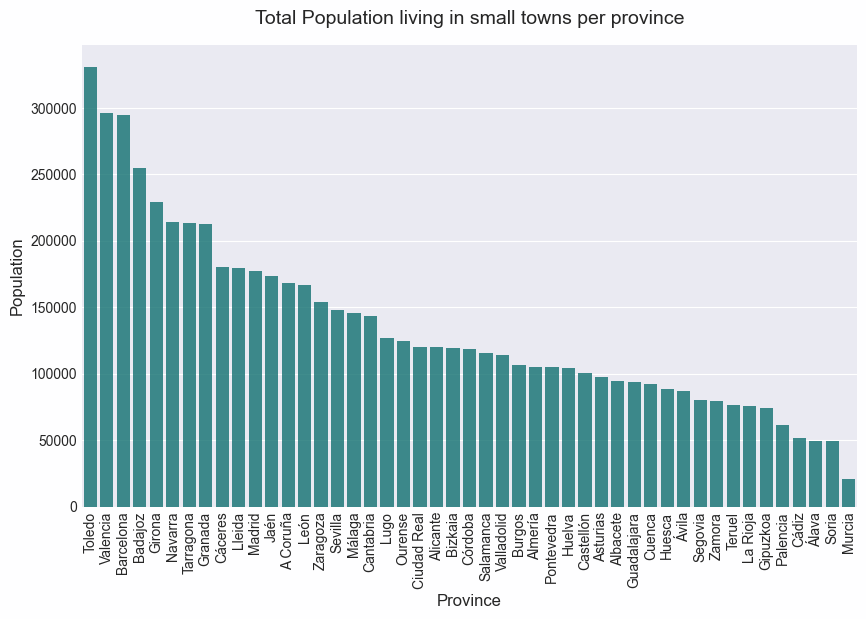

In [77]:
# Group by province and sum the total population
df_grouped = df.groupby("province", as_index=False)["total_population"].sum()

# Sort the grouped DataFrame by total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Population", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Total Population living in small towns per province", fontsize=14, pad=15)

plt.show()

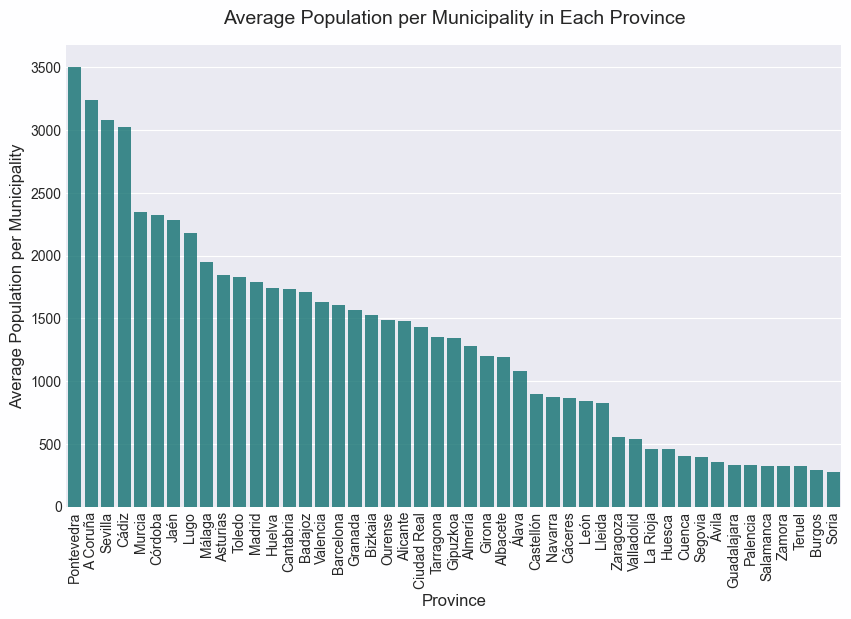

In [78]:
# Group by province and calculate the average population per municipality
df_grouped = df.groupby("province", as_index=False)["total_population"].mean()

# Sort the grouped DataFrame by average total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Average Population per Municipality", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Average Population per Municipality in Each Province", fontsize=14, pad=15)

plt.show()


In [79]:
# Define function to categorize connectivity levels
def categorize_population(size):
    if size >= 3000:
        return "Big"
    elif size >= 500:
        return "Medium"
    elif size >= 100:
        return "Small"
    else:
        return "Very Small"

# Apply the function to create a new column
df["category_town_size"] = df["total_population"].apply(categorize_population)

In [80]:
order = ["Very Small", "Small", "Medium", "Big"]

<Axes: xlabel='category_town_size', ylabel='count'>

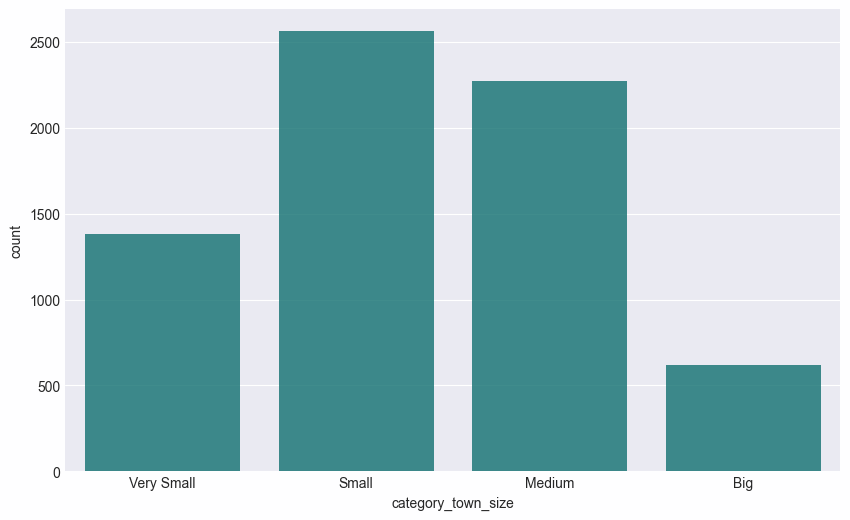

In [81]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "category_town_size",order=order, ax=ax1, color="teal", alpha = 0.8)

# 2. Connectivity

In [82]:
# Group by province and calculate the average population per municipality
df_connectivity = df[['vdsl_30mbps', 'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps','reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz']]

### Meanings of the Connectivity Indicators:

Each of these refers to a different type of broadband or mobile network connectivity in a town. Here's what they mean:

- **vdsl_30mbps** → Availability of VDSL (Very-high-bit-rate Digital Subscriber Line) at 30 Mbps. A faster version of DSL that uses telephone lines.

- **fixed_wireless** → Percentage of coverage by Fixed Wireless Access (FWA), which provides broadband via radio signals instead of cables.

- **ftth** → Fiber-to-the-Home (FTTH) availability, meaning direct fiber optic connections to residences (highest speed and reliability).

- **hfc** → Hybrid Fiber-Coaxial (HFC) availability, a mix of fiber optics and coaxial cable (used in cable internet services).

- **reception_30mbps** → Percentage of the area that can receive at least 30 Mbps (regardless of technology).

- **reception_100mbps** → Percentage of the area that can receive at least 100 Mbps.

- **reception_1gbps** → Percentage of the area that can receive at least 1 Gbps (1000 Mbps).

- **4g** → Coverage of 4G mobile network.

- **5g** → Coverage of 5G mobile network (general).

- **5g_3,5ghz** → Coverage of 5G at 3.5 GHz, a specific frequency band that offers higher speeds and lower latency.


**The 3 Most Important Metrics to Define Connectivity in a Town:**

>**ftth** (Fiber-to-the-Home)
>- Why? It's the gold standard for broadband, offering the fastest speeds, low latency, and high reliability.
>- Key Impact: Towns with high FTTH coverage have superior internet quality.

>**reception_100mbps** or **reception_1gbps**
>- Why? This metric shows how much of the town has access to fast internet speeds (regardless of the technology).
>- Key Impact: Ensures people and businesses can get modern broadband speeds.

>**5g** or **5g_3,5ghz**
>- Why? 5G is essential for mobile and future-proof connectivity (low latency, high-speed mobile broadband).
>- Key Impact: Towns with strong 5G networks can support smart city applications, IoT, and next-gen mobile services.

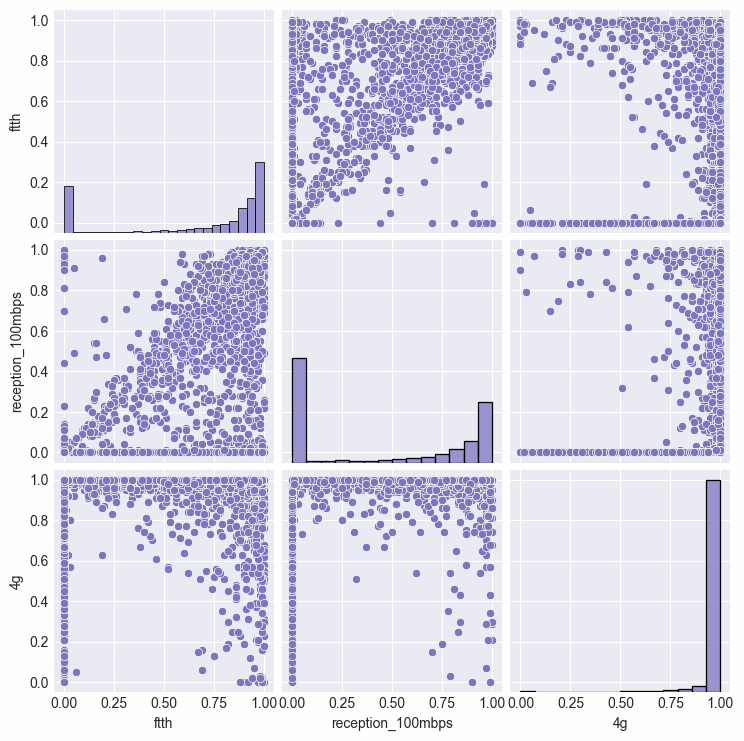

In [83]:
# Group by province and calculate the average population per municipality
df_connectivity = df[[ 'ftth','reception_100mbps', '4g']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


| **Factor**            | **New Weight (%)** | **Reasoning** |
|-----------------------|-------------------|--------------|
| `ftth`               | **50%**            | Fiber is the most important for stable, high-speed connectivity. |
| `reception_100mbps`  | **35%**            | Ensures fast broadband availability, even if not fiber. |
| `4g`                 | **15%**            | Still essential for mobile broadband, but not the primary factor. |

In [84]:
# Define new weights
weights = {
    'ftth': 0.5,
    'reception_100mbps': 0.35,
    '4g': 0.15
}

# Compute the adjusted Connectivity Score
df["score_connectivity"] = (
    df["ftth"] * weights["ftth"] +
    df["reception_100mbps"] * weights["reception_100mbps"] +
    df["4g"] * weights["4g"]
)


### **Connectivity Score Categories**
| **Score Range**  | **Category**          | **Description** |
|------------------|----------------------|----------------|
| **80 - 100**     | **Excellent**         | Strong fiber coverage and high-speed internet. |
| **60 - 79**      | **Good**              | Decent broadband with fiber or high-speed non-fiber options. |
| **40 - 59**      | **Moderate**          | Some high-speed coverage, but fiber may be limited. |
| **20 - 39**      | **Weak**              | Basic connectivity with limited high-speed access. |
| **0 - 19**       | **Poor**              | Very poor or no access to high-speed internet. |

In [85]:
# Define function to categorize connectivity levels
def categorize_connectivity(score):
    if score >= 0.8:
        return "Excellent"
    elif score >= 0.6:
        return "Good"
    elif score >= 0.4:
        return "Moderate"
    elif score >= 0.2:
        return "Weak"
    else:
        return "Poor"

# Apply the function to create a new column
df["category_connectivity"] = df["score_connectivity"].apply(categorize_connectivity)


<Axes: xlabel='category_connectivity', ylabel='Count'>

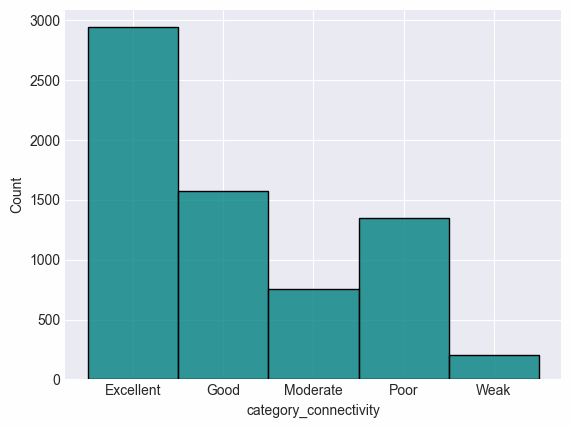

In [86]:
sns.histplot(df, x="category_connectivity", bins=30, color = "teal", alpha = 0.8)

In [87]:
df.drop(columns=["ftth", "hfc", "reception_30mbps", "reception_100mbps", "reception_1gbps", "4g", "5g", "5g_3,5ghz", 'vdsl_30mbps','fixed_wireless'], axis=1, inplace=True)

# 3. Industry

In [88]:
df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']].describe()

,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,4.191474,6.927776,0.055669,0.093906,0.288602,0.916789,0.491210,0.800322
std,10.031502,14.688858,0.647661,0.942664,2.604686,6.979265,3.767258,5.692548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,162.000000,145.000000,16.000000,21.000000,70.000000,129.000000,63.000000,117.000000


In [89]:
df_economy = df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']]

# Define weights for each economic indicator (summing to 1)
economy_weights = {
    'n_industry': 0.25,
    'n_construction': 0.10,
    'n_info_communications': 0.1,
    'n_financial_insurance': 0.1,
    'n_real_estate': 0.1,
    'n_professional_technical': 0.15,
    'n_eduation_health_social': 0.15,
    'n_other': 0.05
}

# Calculate a weighted economy score using the defined weights
df["score_economy"] = df_economy.multiply(pd.Series(economy_weights)).sum(axis=1)

In [90]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', 'lat_bin', 'lon_bin', 'towns_in_vicinity',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses',
       'count_of_stations', 'suburban_train', 'category_town_size',
       'score_connectivity', 'category_connectivity', 'score_economy'],
      dtype='object')

In [91]:
df[df.towns_in_vicinity.isnull()]

df = df.dropna(subset=['towns_in_vicinity'])

In [92]:
df["towns_in_vicinity"].info()

<class 'pandas.core.series.Series'>
Index: 6824 entries, 0 to 8024
Series name: towns_in_vicinity
Non-Null Count  Dtype 
--------------  ----- 
6824 non-null   object
dtypes: object(1)
memory usage: 106.6+ KB


In [93]:
import ast

df["towns_in_vicinity"] = df["towns_in_vicinity"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [94]:
def combine_economy_scores(row):
    base_score = row["score_economy"]
    vicinity = row["towns_in_vicinity"]
    if isinstance(vicinity, list) and vicinity:  # Ensure vicinity is a list
        neighbor_scores = df.loc[df["cmun"].isin(vicinity), "score_economy"]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

In [95]:
df["score_area_economy"] = df.apply(combine_economy_scores, axis=1)

In [96]:
min_score = df["score_area_economy"].min()
max_score = df["score_area_economy"].max()

df["score_area_economy"] = (df["score_area_economy"] - min_score) / (max_score - min_score)

In [97]:
df = df.drop(columns=[col for col in df.columns if col.startswith('n_')])
df = df.sort_values(['latitude', 'longitude'], ascending=False)

<Axes: xlabel='score_area_economy', ylabel='Count'>

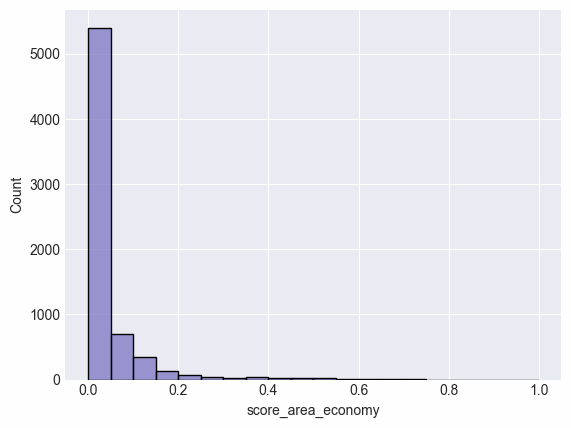

In [98]:
sns.histplot(df["score_area_economy"], bins=20) 

In [99]:
def categorize_economy(score):
    if score < 0.15:
        return "Very Low"
    elif score < 0.25:
        return "Low"
    elif score < 0.50:
        return "Medium-Low"
    elif score < 0.75:
        return "Medium-High"
    else:
        return "High"

df["category_economy"] = df["score_area_economy"].apply(categorize_economy)


<Axes: xlabel='category_economy', ylabel='Count'>

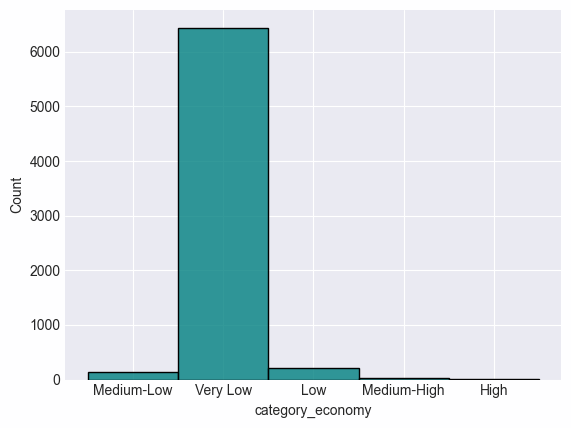

In [100]:
sns.histplot(df, x="category_economy", bins=30, color = "teal", alpha = 0.8)

# 4. Health

In [101]:
pd.set_option('display.max_columns', None)

In [102]:
df["towns_in_vicinity"] = df["towns_in_vicinity"].apply(
    lambda x: ", ".join(map(str, x)) if isinstance(x, list) else x
)

In [103]:
df.reset_index(drop=True, inplace=True)

In [104]:
# df.to_csv("../../data/processed/2_aggregated_pueblos.csv", index=False)

In [105]:
# define bins for the hospital distance (adjust thresholds as needed)
hospital_bins = [df['closest_distance_hospital'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_hospital'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# bin the values into categories
df['closest_distance_hospital_bin'] = pd.cut(df['closest_distance_hospital'], bins=hospital_bins, labels=labels, include_lowest=True)

# apply score based on the bins (10 is best)
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}

df['score_hospital_distance'] = df['closest_distance_hospital_bin'].map(score_mapping)

# second step
def combine_scores(row, column):
    base_score = row[column]
    vicinity = row[column]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin([vicinity]), column]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["score_area_hospital"] = df.apply(lambda row: combine_scores(row, column="score_hospital_distance"), axis=1)

In [106]:
df.drop(columns=["closest_distance_hospital_bin"], axis=1, inplace=True)

# 5. Education

In [107]:
# define bins for the hospital distance (adjust thresholds as needed)
school_bins = [df['closest_distance_school'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_school'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# bin the values into categories
df['closest_distance_school_bin'] = pd.cut(df['closest_distance_school'], bins=school_bins, labels=labels, include_lowest=True)

# apply score based on the bins (10 is best)
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}

df['score_school_distance'] = df['closest_distance_school_bin'].map(score_mapping)

# second step
def combine_scores(row, column):
    base_score = row[column]
    vicinity = row[column]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin([vicinity]), column]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["score_area_school"] = df.apply(lambda row: combine_scores(row, column="score_school_distance"), axis=1)

In [108]:
df.drop(columns=["closest_distance_school_bin"], axis=1, inplace=True)

# 6. Transport

In [109]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', 'lat_bin', 'lon_bin', 'towns_in_vicinity',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'nearest_airport', 'closest_distance_airport',
       'nearest_train_station', 'closest_distance_train',
       'closest_distance_hospital', 'nearest_hospital',
       'closest_distance_school', 'nearest_school', 'koppen_climate',
       'description', 'number_of_houses', 'count_of_stations',
       'suburban_train', 'category_town_size', 'score_connectivity',
       'category_connectivity', 'score_economy', 'score_area_economy',
       'category_economy', 'score_hospital_distance', 'score_area_hospital',
       'score_school_distance', 'score_area_school'],
      dtype='object')

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['closest_distance_train', 'closest_distance_airport',  'count_of_stations']] = scaler.fit_transform(
    df[['closest_distance_train', 'closest_distance_airport',  'count_of_stations']]
)

# Adjusted Weights for Small Towns (Favoring Trains)
weights = {
    'closest_distance_train': -0.3,  # Negative because shorter distance is better
    'closest_distance_airport': -0.1,  # Negative
    'count_of_stations': 0.25,
    'suburban_train': 0.25
}

# Compute Score
df['score_transport'] = (
    weights['closest_distance_train'] * (1 - df['closest_distance_train']) +  # Inverse distance for better accessibility
    weights['closest_distance_airport'] * (1 - df['closest_distance_airport']) +
    weights['count_of_stations'] * df['count_of_stations'] +
    weights['suburban_train'] * df['suburban_train']
)


In [111]:
# Normalize transport_score between 0 and 10
min_transport = df["score_transport"].min()
max_transport = df["score_transport"].max()

df["score_transport"] = (df["score_transport"] - min_transport) / (max_transport - min_transport) * 10


<Axes: xlabel='score_transport', ylabel='Count'>

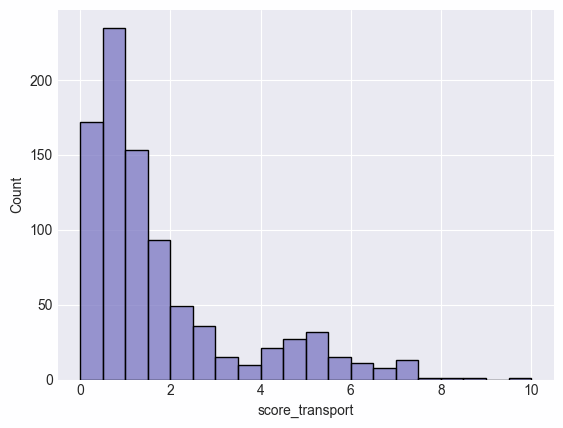

In [112]:
sns.histplot(df["score_transport"],bins=20)

In [113]:
df.drop(columns=[col for col in df.columns if col.endswith('_bin')], inplace=True)

# 7. Town Age

In [114]:
# Define age group columns
age_groups = ["0-17", "18-24", "25-34", "35-54", "55+"]

# Sum only the age group columns
df["total_population"] = df[age_groups].sum(axis=1)

# Compute percentages for each age group
for col in age_groups:
    df[col + "_pct"] = (df[col] / df["total_population"]) * 100

In [115]:
# Define weights for age score
weights = {
    "0-17_pct": 0.5,
    "18-24_pct": 1.0,
    "25-34_pct": 2.0,
    "35-54_pct": 1.5,
    "55+_pct": -1.5  # Negative because higher elderly % means aging town
}

# Compute weighted score
df["score_age"] = sum(df[col] * weight for col, weight in weights.items())


In [116]:
def categorize_by_age_score(score):
    if score > 50:
        return "Very Young Town"
    elif score > 30:
        return "Young & Growing"
    elif score > 10:
        return "Balanced Town"
    elif score > 0:
        return "Aging Town"
    else:
        return "Highly Aging Town"

# Apply final categorization
df["cagetory_town_age"] = df["score_age"].apply(categorize_by_age_score)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Highly Aging Town'),
  Text(1, 0, 'Balanced Town'),
  Text(2, 0, 'Aging Town'),
  Text(3, 0, 'Young & Growing'),
  Text(4, 0, 'Very Young Town')])

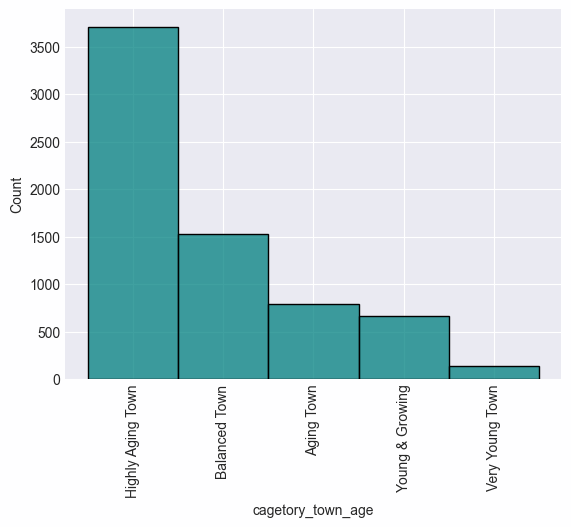

In [117]:
sns.histplot(df["cagetory_town_age"], color="teal")
plt.xticks(rotation=90)

In [118]:
df.head()

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,towns_in_vicinity,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,count_of_stations,suburban_train,category_town_size,score_connectivity,category_connectivity,score_economy,score_area_economy,category_economy,score_hospital_distance,score_area_hospital,score_school_distance,score_area_school,score_transport,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,score_age,cagetory_town_age
0,15061,Ortigueira,A Coruña,Galicia,12.53020,-7.851941,43.68634,"(15015, 15022, 15025, 15035, 15036, 15049, 150...",458,261,393,1362,2974,2588,2860,5448,Aeropuerto de A Coruña,0.381115,Neda,0.335121,35.197582,Hospital Naval,0.074362,ESMU Municipal de Ortigueira,Cfb,Oceanic Climate - Mild temperatures and consis...,5881.0,0.5,1.0,Big,0.4630,Moderate,23.25,0.366719,Medium-Low,1,0.5,10,5.0,7.462522,8.406755,4.790749,7.213656,25.000000,54.588840,-20.961821,Highly Aging Town
1,27025,Xove,Lugo,Galicia,61.07624,-7.512421,43.68557,"(15025, 15061, 15070, 15081, 27001, 27002, 270...",379,164,304,1070,1381,1713,1585,3298,Aeropuerto de A Coruña,0.521370,Neda,0.577933,12.862127,Hospital Publico Da Mariña (*),0.261546,ESMU Municipal de Xove,Cfb,Oceanic Climate - Mild temperatures and consis...,2166.0,0.3,0.0,Big,0.9035,Excellent,4.15,0.065457,Very Low,6,3.0,10,5.0,4.344906,11.491813,4.972711,9.217708,32.443905,41.873863,15.009096,Balanced Town
2,27013,Cervo,Lugo,Galicia,59.01057,-7.447690,43.68209,"(15061, 27001, 27002, 27005, 27019, 27025, 270...",457,187,331,1219,1988,2059,2123,4182,Aeropuerto de A Coruña,0.549363,Neda,0.626539,7.833767,Hospital Publico Da Mariña (*),0.955346,CEIP Península da Paz,Cfb,Oceanic Climate - Mild temperatures and consis...,2940.0,0.2,0.0,Big,0.8185,Excellent,5.35,0.084385,Very Low,8,4.0,10,5.0,4.233459,10.927786,4.471545,7.914873,29.148733,47.537064,-1.817312,Highly Aging Town
3,15025,Cerdido,A Coruña,Galicia,127.01170,-7.994961,43.62384,"(15004, 15008, 15015, 15022, 15035, 15036, 150...",92,34,68,269,540,486,517,1003,Aeropuerto de A Coruña,0.297304,Neda,0.200310,21.739239,Hospital Naval,4.046604,CEIP da Barqueira,Cfb,Oceanic Climate - Mild temperatures and consis...,746.0,0.1,1.0,Medium,0.2640,Weak,2.40,0.037855,Very Low,3,1.5,10,5.0,5.285563,9.172483,3.389831,6.779661,26.819541,53.838485,-18.993021,Highly Aging Town
4,33070,Tapia de Casariego,Asturias,Asturias,25.45387,-6.943604,43.56975,"(27002, 27005, 27019, 27027, 27030, 27048, 270...",378,198,263,978,1754,1724,1847,3571,Aeropuerto de Asturias,0.467802,Rabade,0.761139,16.127239,Hospital Comarcal De Jarrio,0.033554,I.E.S. Marqués de Casariego,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",3277.0,0.0,0.0,Big,0.8905,Excellent,8.50,0.134069,Very Low,4,2.0,10,5.0,3.973435,10.585270,5.544665,7.364884,27.387286,49.117894,-7.028843,Highly Aging Town


In [124]:
df[df["nearest_airport"].isna()]

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,towns_in_vicinity,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,count_of_stations,suburban_train,category_town_size,score_connectivity,category_connectivity,score_economy,score_area_economy,category_economy,score_hospital_distance,score_area_hospital,score_school_distance,score_area_school,score_transport,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,score_age,cagetory_town_age
422,31123,Uharte Arakil,Navarra,Navarra,473.19250,-1.969659,42.92068,"(1009, 1053, 1056, 1061, 20001, 20002, 20004, ...",138,44,65,230,316,416,377,793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.0,NaN,NaN,Medium,0.9300,Excellent,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,17.402270,5.548550,8.196721,29.003783,39.848676,14.375788,Balanced Town
429,31084,Etxarri Aranatz,Navarra,Navarra,511.88780,-2.064756,42.90774,"(1001, 1009, 1013, 1017, 1021, 1027, 1037, 105...",505,161,230,701,942,1318,1221,2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0,NaN,NaN,Medium,0.9880,Excellent,6.30,0.099369,Very Low,NaN,NaN,NaN,NaN,NaN,19.889720,6.341079,9.058685,27.609295,37.101221,20.165419,Balanced Town
478,1051,Agurain/Salvatierra,Álava,País Vasco,603.86960,-2.389455,42.85244,"(1001, 1003, 1009, 1013, 1016, 1017, 1018, 101...",1098,348,460,1585,1656,2596,2551,5147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2502.0,0.0,0.0,Big,0.9745,Excellent,13.75,0.216877,Low,NaN,NaN,NaN,NaN,NaN,21.332815,6.761220,8.937245,30.794638,32.174082,33.232951,Young & Growing
1858,49220,"Torre del Valle, La",Zamora,Castilla León,734.07460,-5.722671,42.09027,"(24002, 24003, 24005, 24010, 24017, 24026, 240...",6,6,8,27,79,68,58,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN,Small,0.5650,Moderate,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,4.761905,4.761905,6.349206,21.428571,62.698413,-42.063492,Highly Aging Town
2094,8116,"Masies de Roda, Les",Barcelona,Cataluña,469.47340,2.317853,41.98956,"(8004, 8005, 8010, 8012, 8014, 8017, 8018, 802...",139,51,73,206,280,385,364,749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,NaN,Medium,0.9495,Excellent,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,18.558077,6.809079,9.746328,27.503338,37.383178,20.761015,Balanced Town
2280,42160,"Royo, El",Soria,Castilla León,1067.99300,-2.644564,41.90840,"(9067, 9232, 9289, 9309, 9425, 10154, 26004, 2...",12,10,25,61,144,136,116,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,NaN,Small,0.5550,Moderate,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,4.761905,3.968254,9.920635,24.206349,57.142857,-23.214286,Highly Aging Town
3228,43113,"Pont d'Armentera, El",Tarragona,Cataluña,351.71520,1.362615,41.38407,"(8008, 8013, 8021, 8027, 8028, 8043, 8044, 804...",62,27,50,132,227,247,251,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,NaN,NaN,Small,0.9490,Excellent,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,12.449799,5.421687,10.040161,26.506024,45.582329,3.112450,Aging Town
3289,49024,"Bóveda de Toro, La",Zamora,Castilla León,706.08560,-5.410796,41.34445,"(37017, 37020, 37031, 37033, 37062, 37073, 370...",45,32,58,176,364,347,328,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665.0,NaN,NaN,Medium,0.9865,Excellent,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,6.666667,4.740741,8.592593,26.074074,53.925926,-16.518519,Highly Aging Town
3712,37034,"Arco, El",Salamanca,Castilla León,779.96770,-5.825583,41.11082,"(37016, 37017, 37019, 37020, 37023, 37025, 370...",11,6,8,27,41,46,47,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,Very Small,0.6300,Good,0.00,0.000000,Very Low,NaN,NaN,NaN,NaN,NaN,11.827957,6.451613,8.602151,29.032258,44.086022,6.989247,Aging Town
3776,28069,"Hiruela, La",Madrid,Madrid,1255.35600,-3.454731,41.07850,"(19005, 19008, 19037, 19042, 19057, 19060, 190...",8,3,4,22,47,52,32,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [121]:
df.to_csv("../../data/processed/2_scored_pueblos.csv", index=False)

In [ ]:
df.to_csv("../../data/end_product_data/2_scored_pueblos.csv", index=False)